<center><h1>Assignment 1</h1></center>

## Generic environment setup

In [1]:
# assignment main dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# matplotlib plotting config
%matplotlib inline

## Data

First we read the CSV file at hand into a Pandas DataFrame, `df`, via the `read_csv()` method.

In [3]:
# read csv into a dataframe
df = pd.read_csv('data/data.csv')

Next, we query descriptive statistics on the DataFrame by the `describe()` method.

In [4]:
# get descriptive statistics of dataframe
df.describe()

,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Also, we learn about the data types of the features by printing out the `dtypes` attribute of the DataFrame.

In [5]:
# get data types of dataframe
print(df.dtypes)

Date                               object
Rented Bike Count                   int64
Hour                                int64
Temperature(Celsius)              float64
Humidity(%)                         int64
Wind speed (m/s)                  float64
Visibility (10m)                    int64
Dew point temperature(Celsius)    float64
Solar Radiation (MJ/m2)           float64
Rainfall(mm)                      float64
Snowfall (cm)                     float64
dtype: object


The above output shows, that DataFrame has 3 different data types; object, int64 and float64. Since the features are already in the appropriate data type, there is no reason to convert it to any other.

Finally, to see the dimensions of the data, we print out the `shape` attribute of the DataFrame.

In [6]:
# get dimensions of dataframe
print(df.shape)

(8760, 11)


The above output shows, that the DataFrame consists of 8760 rows, and 11 columns.

Because the Date feature is irrelevant for the models, we drop it.

In [7]:
# drop redundant feature
df = df.drop('Date', axis=1)

Next, we create a `target`, and `feature` DataFrame, whereby the former holds values for the 'Rented Bike Count' feature, while the latter one takes on the rest of the 9 features.

In [8]:
# select target and feature column(s)
target_name = 'Rented Bike Count'
target = df[target_name]
feature = df.drop(target_name, axis=1)

Additionally, we plot a matrix of scatter plots by using `scatter_matrix`. We chose the `scatter_matrix` plotting option, because it incorporates individual histograms for each feature (main diagonal), as well as shows the interaction between `target` and `feature` in a single plot.

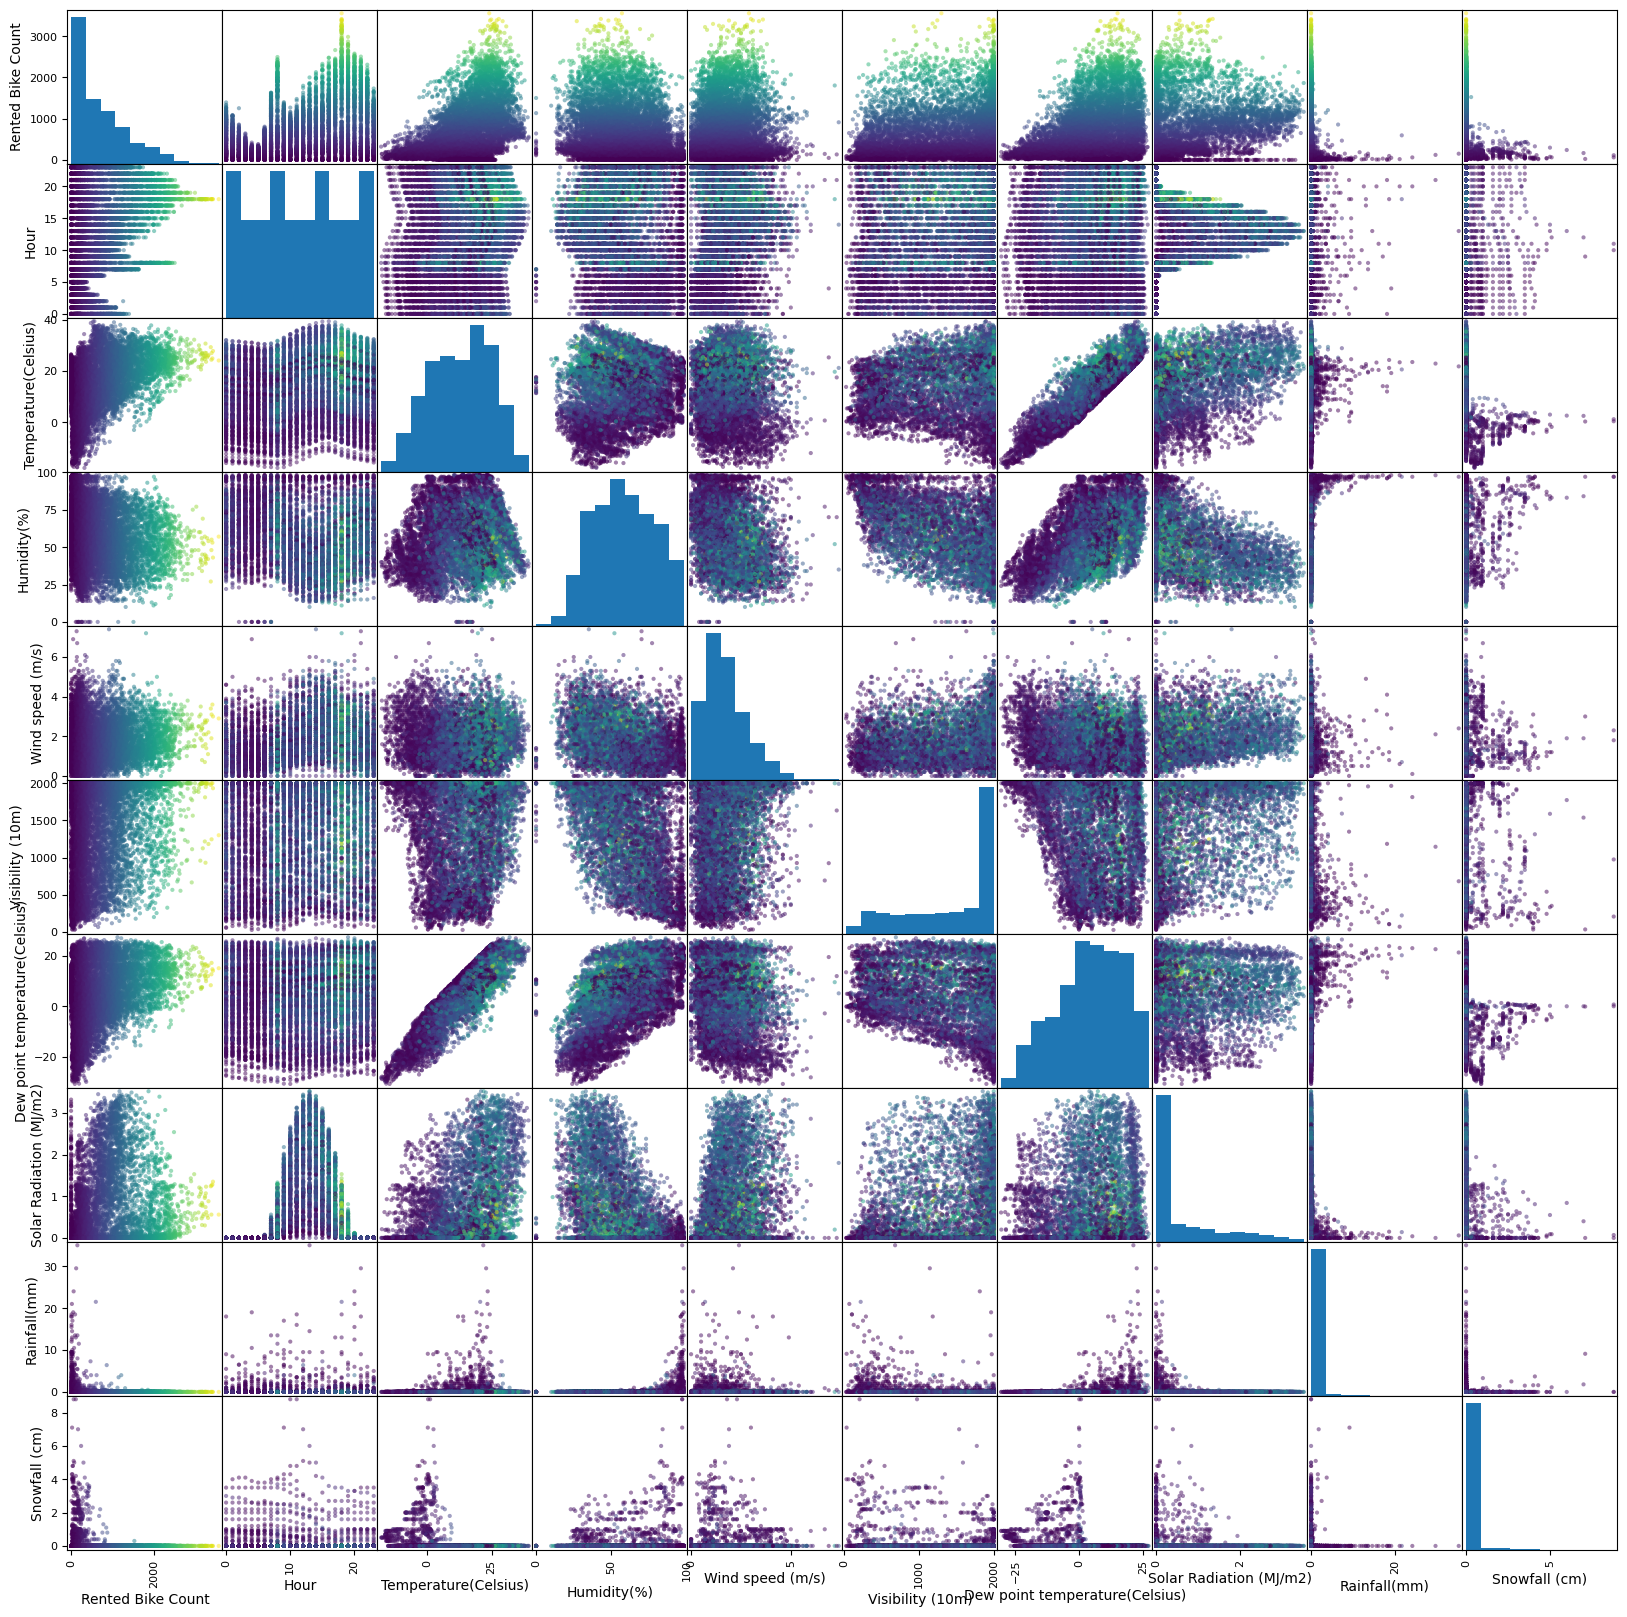

In [9]:
# visualise all features in a scatter matrix
df_scatter_matrix = pd.plotting.scatter_matrix(df, c=target, figsize=(20, 20))

## Regression

In this section, we use different regression models to model relationships between the 'Rented Bike Count' dependent variable and multiple independent variables. With the regression tasks, we aim to to predict the number of bikes rented each hour.

We start the modeling task by splitting the data into a 75% training- and 25% test partition. The training set is used to train the model, and the test set to evaluate the model accuracy  on unseen data. Furthermore, we set a seed value so to keep the results reproducible.

In [10]:
from sklearn.model_selection import train_test_split

# split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=8)
print("trainig set size: {}\ntest set size: {}".format(y_train.shape[0], y_test.shape[0]))

trainig set size: 6570
test set size: 2190


The above output further confirms, that the data is split in a 3/4 and 1/4 ratio for the trainig and test set respectively.

### Ordinary Least-Squares regression model

This section models the relationship between the dependent variable and independent variables by means of OLS regression.

We start out by importing the necessary module for the task, `LinearRegression`. Next, we train the model on the training set. The model yields an estimate for each feature and the intercept, that can be accessed through the `coef_` and `intercept_` attributes respectively.

In [11]:
from sklearn.linear_model import LinearRegression

# linear regression
lr = LinearRegression().fit(X_train, y_train)

coef = {feat_name:round(est, 2) for feat_name, est in zip(lr.feature_names_in_, lr.coef_)}

print("Linear regression intercept (b): {:.2f}\n".format(lr.intercept_))
print("Linear regression coefficients (w[i]): {}\n".format(coef))

Linear regression intercept (b): 517.70

Linear regression coefficients (w[i]): {'Hour': 26.88, 'Temperature(Celsius)': 27.89, 'Humidity(%)': -8.48, 'Wind speed (m/s)': 10.37, 'Visibility (10m)': 0.02, 'Dew point temperature(Celsius)': 4.5, 'Solar Radiation (MJ/m2)': -85.23, 'Rainfall(mm)': -56.85, 'Snowfall (cm)': 26.58}



Based on the above output we can report the regression function:

$\widehat{rented\_bike\_count} = 517.70 + 26.88*hour + 27.89*temperature -8.48*humidity, 10.37*wind\_speed + 0.02*visibility + 4.5*dew\_point -85.23*solar\_radiation -56.85*rainfall + 26.58*snowfall$ 

Now that the model is trained and we have the specific parameter estimates at our disposal, we can use it to make predictions. 

Below, we use the training and test set to feed the model with. The `.predict()` method yields predictions for 'Rented Bike Count', that we can compare to the true values of 'Rented Bike Count' later.

In [12]:
# Get OLS predicted values for the test and training set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

y_train_true = y_train
y_test_true = y_test

Below, we compare the predicted values to the true values of 'Rented Bike Count', and calculate the Mean Squared Error measure for both the training and test set.

In [13]:
from sklearn.metrics import mean_squared_error

print("Training set MSE score: {:.2f}".format(mean_squared_error(y_train_true, y_train_pred)))
print("Test set MSE score: {:.2f}".format(mean_squared_error(y_test_true, y_test_pred)))

Training set MSE score: 221959.86
Test set MSE score: 215331.07


MSE is the sum of the squared difference between the predicted and observed values, adjusted for the sample size. Since MSE is an unstandardised measure of accuracy, its interpretation is rather vague. What we can state, however, is that the lower the MSE, the higher the accuracy of the model.

Below, we compare the predicted values to the true values of 'Rented Bike Count', and calculate the Mean Absolute Error measure for both the training and test set.

In [14]:
from sklearn.metrics import mean_absolute_error

print("Training set MAE score: {:.2f}".format(mean_absolute_error(y_train_true, y_train_pred)))
print("Test set MAE score: {:.2f}".format(mean_absolute_error(y_test_true, y_test_pred)))

Training set MAE score: 348.45
Test set MAE score: 345.17


MAE is the sum of the absolute difference between the predicted and observed values, adjusted for the sample size. Similarly to MSE, MAE is an unstandardised measure of accuracy. Therefore, we can only state, that the lower the MAE, the higher the accuracy of the model.

Since MSE employs a power function to yield positive results, it also bears with higher amplification (as long as the the absolulte differnce between the observed and predicted value is greater than 1). Therefore, it was expected to see a lower MAE score compared to that of MSE. 

Below, we calculate the R-squared coefficient of determination value for both the training and test set.

In [15]:
print("Training set R-squared score: {:.6f}".format(lr.score(X_train, y_train)))
print("Test set R-squared score: {:.6f}".format(lr.score(X_test, y_test)))

Training set R-squared score: 0.467193
Test set R-squared score: 0.479691


The above output shows that for the training set approximately 46.72% of variation in 'Rented Bike Count' is explained by the variance of the independent variables. The model on unseen data (test set) performs slightly better, and yields and R-Squared score of 47.97%. The low and similar R-Squared scores refers to poor model quality, and underfitting.

## Ridge regression model

This section models the relationship between the dependent variable and independent variables by means of Ridge regression.

Since this regression model allows for L2 regularisation, we can try out multiple `alpha` values to evaluate model accuracy, and pick one with the best accuracy score. We achieve to find the optimum `alpha` by Grid Search with Cross Validation.

In the case of Grid Search, the general practice is to split the training set again to a training, and a validation partition, to find the optimum parameters. We will not perform this step, since the `GridSearchCV` function takes care of this internally.

Therefore, we start by importing the necessary modules; `Ridge` and `GridSearch`. Next, for the `GridSearchCV` function we pass the following arguments: the model object (`Ridge()`), parameter grid (that holds the potential values for `alpha`), the number of folds for cross-validation, and lastly, the scoring criteria.
We want `GridSearchCV` to pick the best `alpha` value based on the highest resulting R-Squared value, therefore, we specify `scoring='r2'` for the function in question. Finally, we fit the model to yield the estimates.

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [10 ** n for n in range(-6, 7)]}
print("Parameter grid:\n{}\n".format(param_grid))

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))
print("Best estimator: {}\n".format(grid_search.best_estimator_))

print("Ridge training set score: {:.6f}".format(grid_search.score(X_train, y_train)))
print("Ridge test set score: {:.6f}".format(grid_search.score(X_test, y_test)))

Parameter grid:
{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

Best parameters: {'alpha': 100}
Best cross-validation score: 0.465600
Best estimator: Ridge(alpha=100)

Ridge training set score: 0.467178
Ridge test set score: 0.479852


The above prints show, that the highest model accuracy is obtained when the argument is `alpha=100`.

Furthermore, we see that the R-Squared scores are still low, and are not far from each other for the training and test set. The R-Squared results, therefore, points towards poor model quality and underfitting.

Below, we plot the 
R-Squared coefficient of determination against `alpha`.

Above, we have performed the Grid Search with 13 different values, starting from $10^{-6}$ up to $10^6$ with a 10 fold increment between each. From the plot we see that for small alpha values, the R-Squared scores are nearly constant up to `alpha=10`. From the point of `alpha=10` on, we see the model accuracy further diminishes as we increase `alpha`.

## Lasso regression model

This section models the relationship between the dependent variable and independent variables by means of Lasso regression.

The Lasso regression allows for L1 regularisation, therefore, we can try out multiple `alpha` values and calibrate the model with one that yields the highest accuracy. For `alpha`, we use 17 different values, starting from $10^{−6}$  up to $10^6$  with a 10 fold increment between each. For the small `alpha` values, the maximum iteration count must be increased, and so we decided to use a fixated 100000 maximum iteration count for each alphas.

For this task we start out by importing the necessary modules; `Lasso`. Next, for the `GridSearchCV` function we pass the following arguments: the model object (`Lasso()`), parameter grid (that holds the potential values for `alpha`), the number of folds for cross-validation, and lastly, the scoring criteria.
We want `GridSearchCV` to pick the best `alpha` value based on the highest resulting R-Squared value, therefore, we specify `scoring='r2'` for the function in question. Finally, we fit the model to yield the estimates.

In [18]:
from sklearn.linear_model import Lasso

param_grid = {'alpha': [10 ** n for n in range(-6, 7)],
              'max_iter': [100000]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))
print("Best estimator: {}\n".format(grid_search.best_estimator_))

print("Lasso training set score: {:.6f}".format(grid_search.score(X_train, y_train)))
print("Lasso test set score: {:.6f}".format(grid_search.score(X_test, y_test)))

Parameter grid:
{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], 'max_iter': [100000]}
Best parameters: {'alpha': 0.01, 'max_iter': 100000}
Best cross-validation score: 0.465594
Best estimator: Lasso(alpha=0.01, max_iter=100000)

Lasso training set score: 0.467193
Lasso test set score: 0.479693


The above output shows, that the highest model accuracy is obtained when the argument is `alpha=0.01`, and `max_iter=100000`.

Furthermore, we see that the R-Squared scores are still low, and are not far from each other for the training and test set. The R-Squared results, therefore, alludes that the model quality is of low quality and underfitting.

Below, we plot the R-Sqaured coefficient of determination against `alpha`.

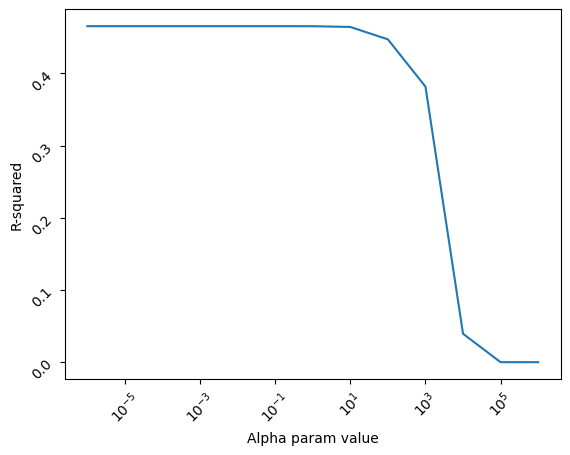

In [19]:
y_val = grid_search.cv_results_['mean_test_score'].tolist()
x_val = grid_search.cv_results_['param_alpha'].tolist()

fig, ax = plt.subplots(1)

ax.plot(x_val, y_val)
ax.set_xscale('log')

# plot appearance 
ax.tick_params(labelrotation=45)
ax.set_xlabel("Alpha param value")
ax.set_ylabel("R-squared")
plt.show()

The plot clearly shows, that for small alpha values, the R-Squared scores are approximately constant up to `alpha=10`. From the point of `alpha=10` on, we see the model accuracy degrades.